**With using convolutional neural network**, we are going to classify multi-selectional choice problems with MNIST fashion set data

In [1]:
!nvidia-smi

Wed Jun 28 13:05:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.47                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 L...    On | 00000000:01:00.0 Off |                  N/A |
| N/A   60C    P8               11W /  N/A|     13MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3,
                                  activation='relu',
                                  padding='same',
                                  input_shape=(28,28,1)))
    # use 32 filters (kernels)
    # kernel size is (3, 3)
    # relu activation function
    # same padding is used
    # input will be the single image (28 * 28 * 1(depth, only monocolor picture))

In [4]:
model.add(keras.layers.MaxPooling2D(2))     # apply 2X2 pooling

# Pooling decreases the size of the feature, now (14, 14, 3)

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))      # increase filter count to 64
model.add(keras.layers.MaxPooling2D(2))

# Pooling decreases the sisze of the feature, now (7, 7, 64) <--- why 64? That's because of the increment of the filter counte

In [6]:
# Because the final 10 neuron will calculate the possiblity for classification, we need to do flattening
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))         # more and more hidden layer
model.add(keras.layers.Dropout(0.4))                            # prevent overfitting
model.add(keras.layers.Dense(10, activation = "softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

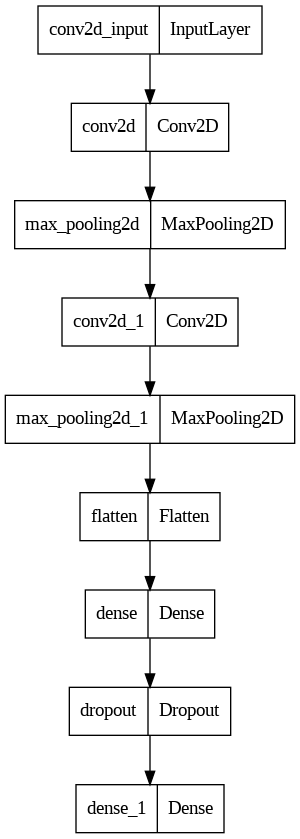

In [8]:
keras.utils.plot_model(model)

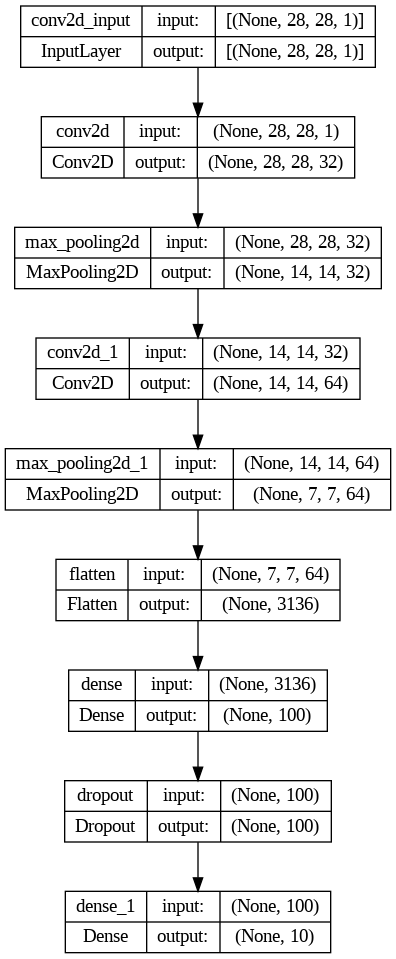

In [9]:
keras.utils.plot_model(model, show_shapes = True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 5ms/step - loss: 0.5329 - accuracy: 0.8078 - val_loss: 0.3335 - val_accuracy: 0.8768
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3509 - accuracy: 0.8743 - val_loss: 0.2773 - val_accuracy: 0.8992
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3010 - accuracy: 0.8920 - val_loss: 0.2539 - val_accuracy: 0.9077
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2701 - accuracy: 0.9021 - val_loss: 0.2393 - val_accuracy: 0.9103
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2449 - accuracy: 0.9111 - val_loss: 0.2362 - val_accuracy: 0.9130
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2249 - accuracy: 0.9174 - val_loss: 0.2338 - val_accuracy: 0.9122
Epoch 7/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2081 - accuracy: 0.9239 - val_loss: 0.2254 - val_accurac

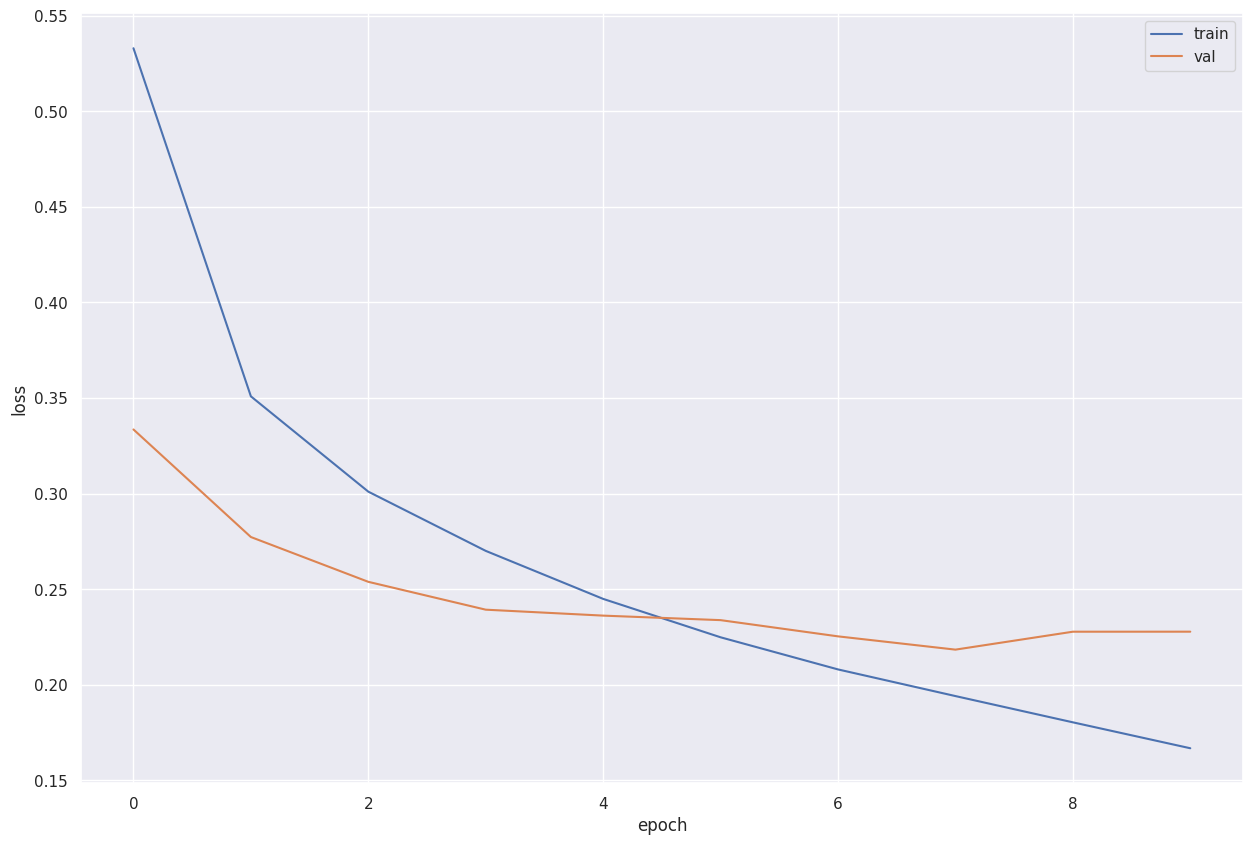

In [27]:
# Visualize the performance
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2184 - accuracy: 0.9181


[0.21841196715831757, 0.9180833101272583]

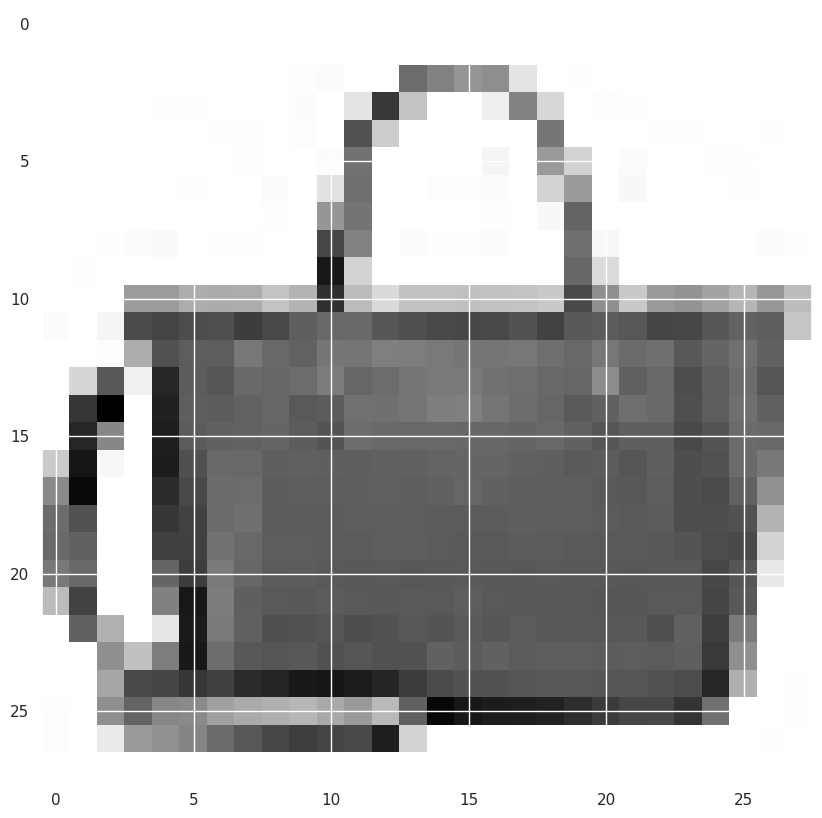

In [29]:
# Visualize the first image

plt.imshow(val_scaled[0].reshape(28, 28), cmap = "gray_r")
plt.show()

In [30]:
#preds = model.predict(val_scaled[0])           # <--- [X] (28, 28, 1)
preds = model.predict(val_scaled[0 : 1])        # <--- [O] (1, 28, 28, 1)  (batch dimension)
print(preds)

1/1 [==============================] - 0s 20ms/step
[[6.1456281e-18 7.9646071e-24 5.0706410e-21 4.5725671e-19 9.3983864e-18
  5.6253062e-16 6.8886344e-18 5.0192956e-21 1.0000000e+00 3.6124610e-23]]


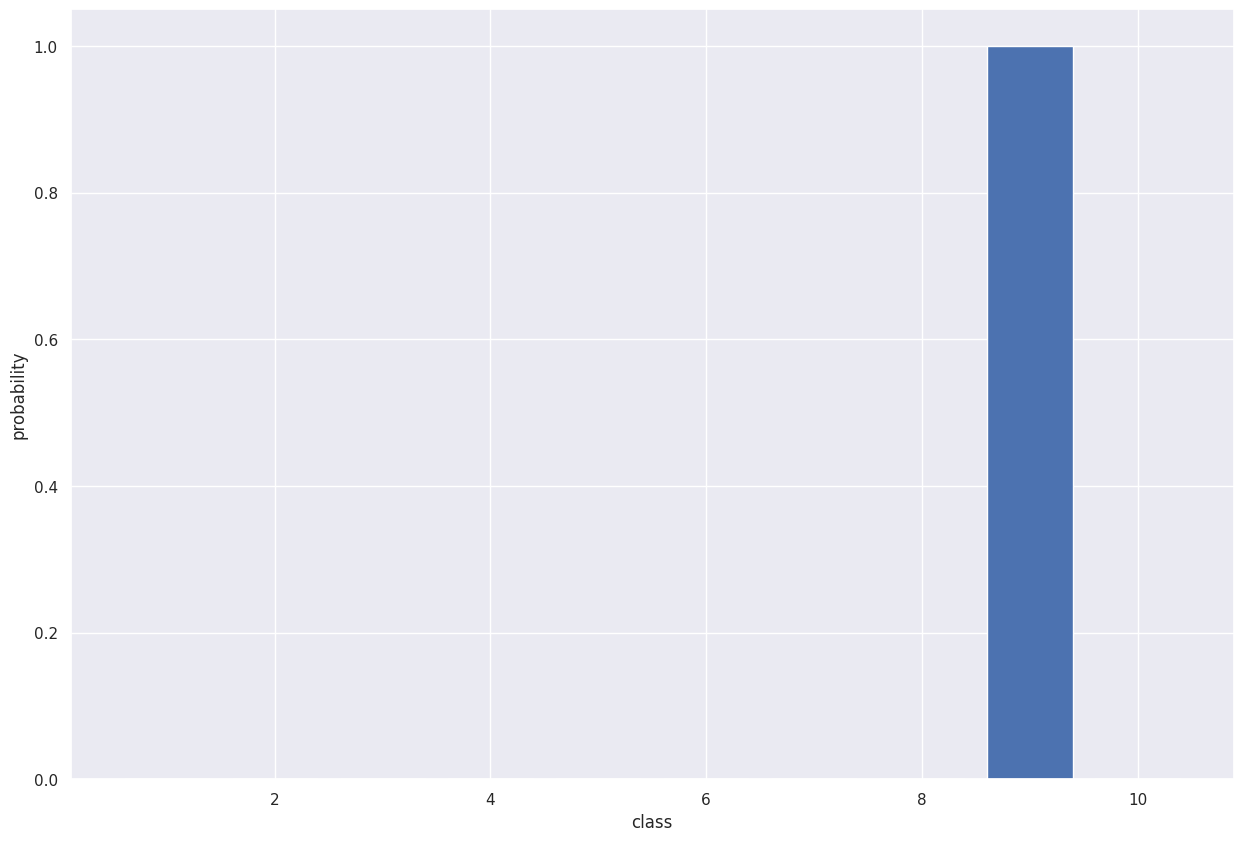

In [31]:
# Visualize the probability
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("probability")

plt.show()

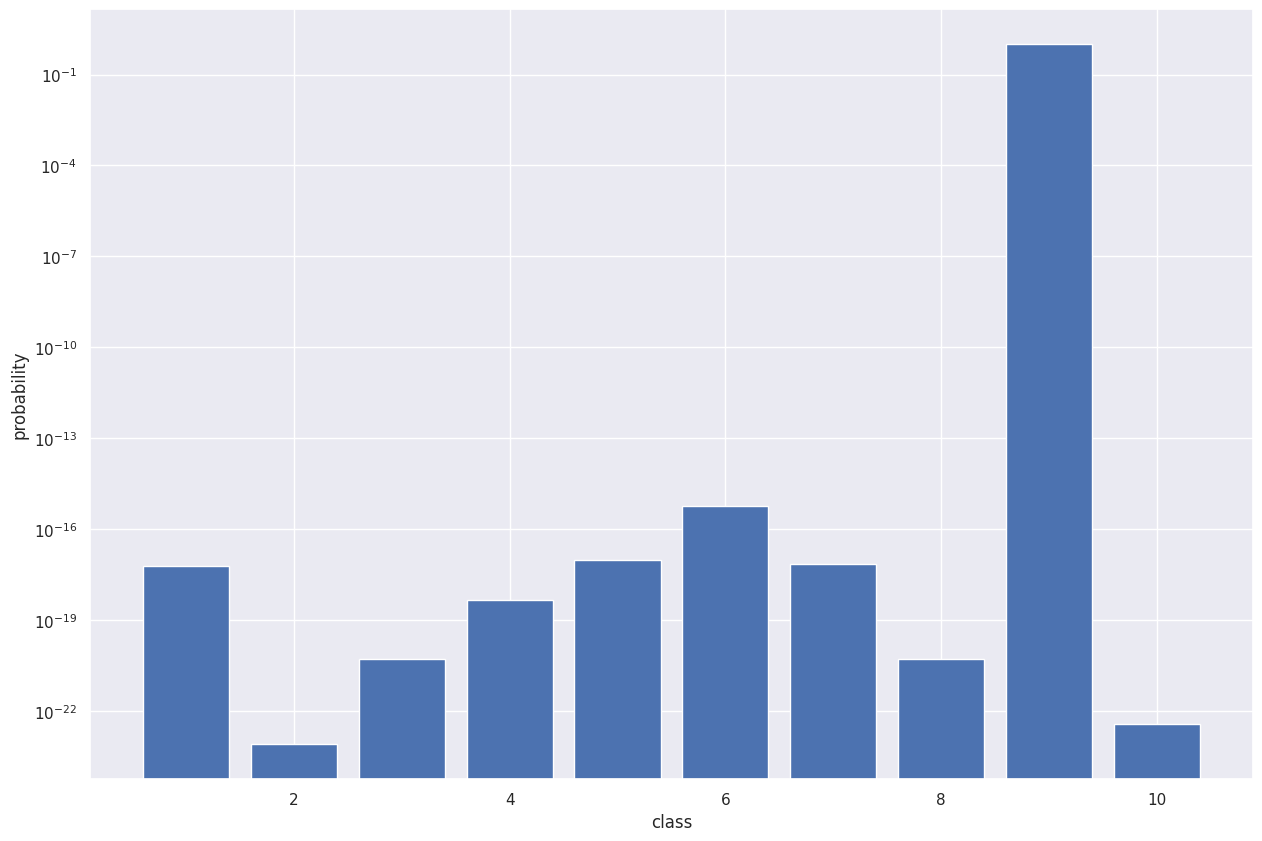

In [32]:
# Visualize the probability
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("probability")
plt.yscale("log")               # <--- too smol, let's see logarithmic axis!

plt.show()

In [33]:
classes = ["t-shirt", "pants", "sweater", "dress", "coat", "sandel", "shirt", "sneakers", "bag", "ankle boots"]

In [34]:
import numpy as np
print(classes[np.argmax(preds)])            # Which is the first prediction?

bag


In [35]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [36]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2442 - accuracy: 0.9134


[0.24424098432064056, 0.9133999943733215]

The current model roughly expects ~91.3% of accuracy in real given data

**Deep inspection of the model prediction**

In [37]:
model_prediction_result = model.predict(test_scaled)

313/313 [==============================] - 1s 3ms/step


In [38]:
model_prediction_result = [classes[np.argmax(x)] for x in model_prediction_result]
model_prediction_answer = [classes[x] for x in test_target]

In [39]:
print(model_prediction_result)

['ankle boots', 'sweater', 'pants', 'pants', 'shirt', 'pants', 'coat', 'shirt', 'sandel', 'sneakers', 'coat', 'sandel', 'sandel', 'dress', 'coat', 'pants', 'sweater', 'coat', 'bag', 't-shirt', 'sweater', 'sandel', 'sneakers', 'sandel', 'pants', 'sweater', 'shirt', 't-shirt', 'ankle boots', 'dress', 'bag', 'bag', 'dress', 'dress', 'bag', 't-shirt', 'sneakers', 'sandel', 'sneakers', 'ankle boots', 't-shirt', 'pants', 't-shirt', 'sneakers', 'shirt', 'sneakers', 'sweater', 'pants', 'sweater', 'shirt', 'coat', 'coat', 'sandel', 'bag', 'sweater', 'sweater', 'bag', 'coat', 'bag', 't-shirt', 'sneakers', 'sneakers', 'bag', 'sandel', 'pants', 'pants', 'sweater', 'dress', 'sneakers', 'bag', 'sneakers', 't-shirt', 'sweater', 'shirt', 'sweater', 'dress', 'pants', 'sweater', 'bag', 'coat', 'pants', 'bag', 'sandel', 'ankle boots', 'sandel', 't-shirt', 'dress', 'sweater', 't-shirt', 'sweater', 'sandel', 'dress', 'shirt', 'sneakers', 'pants', 'bag', 't-shirt', 'pants', 'sweater', 'sweater', 'dress', 's

In [40]:
print(model_prediction_answer)

['ankle boots', 'sweater', 'pants', 'pants', 'shirt', 'pants', 'coat', 'shirt', 'sandel', 'sneakers', 'coat', 'sandel', 'sneakers', 'dress', 'coat', 'pants', 'sweater', 'coat', 'bag', 't-shirt', 'sweater', 'sandel', 'sneakers', 'ankle boots', 'pants', 'coat', 'shirt', 't-shirt', 'ankle boots', 'dress', 'bag', 'bag', 'dress', 'dress', 'bag', 't-shirt', 'sneakers', 'sandel', 'sneakers', 'ankle boots', 'shirt', 'pants', 'dress', 'sneakers', 'shirt', 'sneakers', 'sweater', 'pants', 'sweater', 'sweater', 'coat', 'coat', 'sandel', 'bag', 'sweater', 'sweater', 'bag', 'coat', 'bag', 't-shirt', 'sneakers', 'sneakers', 'bag', 'sandel', 'pants', 'pants', 'sweater', 'dress', 'ankle boots', 'bag', 'sneakers', 't-shirt', 'sweater', 'shirt', 'sweater', 'dress', 'pants', 'sweater', 'bag', 'coat', 'pants', 'bag', 'sandel', 'ankle boots', 'sandel', 't-shirt', 'dress', 'sweater', 't-shirt', 'shirt', 'sandel', 'dress', 'shirt', 'sneakers', 'pants', 'bag', 't-shirt', 'pants', 'coat', 'sweater', 'dress', 's

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(model_prediction_result, model_prediction_answer)

array([[957,   0,   1,   0,   0,   1,   0,  13,   0,   1],
       [  0, 983,   3,   0,   2,   0,  10,   0,   1,   3],
       [  0,   4, 888,  23,   0,   0,  92,   0,  69,   5],
       [  0,   3,  34, 932,   8,   0,  31,   0,   5,  19],
       [  0,   1,   0,   4, 985,   0,   0,   0,   1,   0],
       [  6,   1,   0,   0,   0, 989,   0,   9,   0,   1],
       [  1,   1,  24,  17,   4,   0, 666,   0,  37,  69],
       [ 36,   2,   0,   0,   0,  10,   0, 978,   0,   0],
       [  0,   1,  49,   9,   0,   0,  69,   0, 872,  18],
       [  0,   4,   1,  15,   1,   0, 132,   0,  15, 884]])

<Axes: >

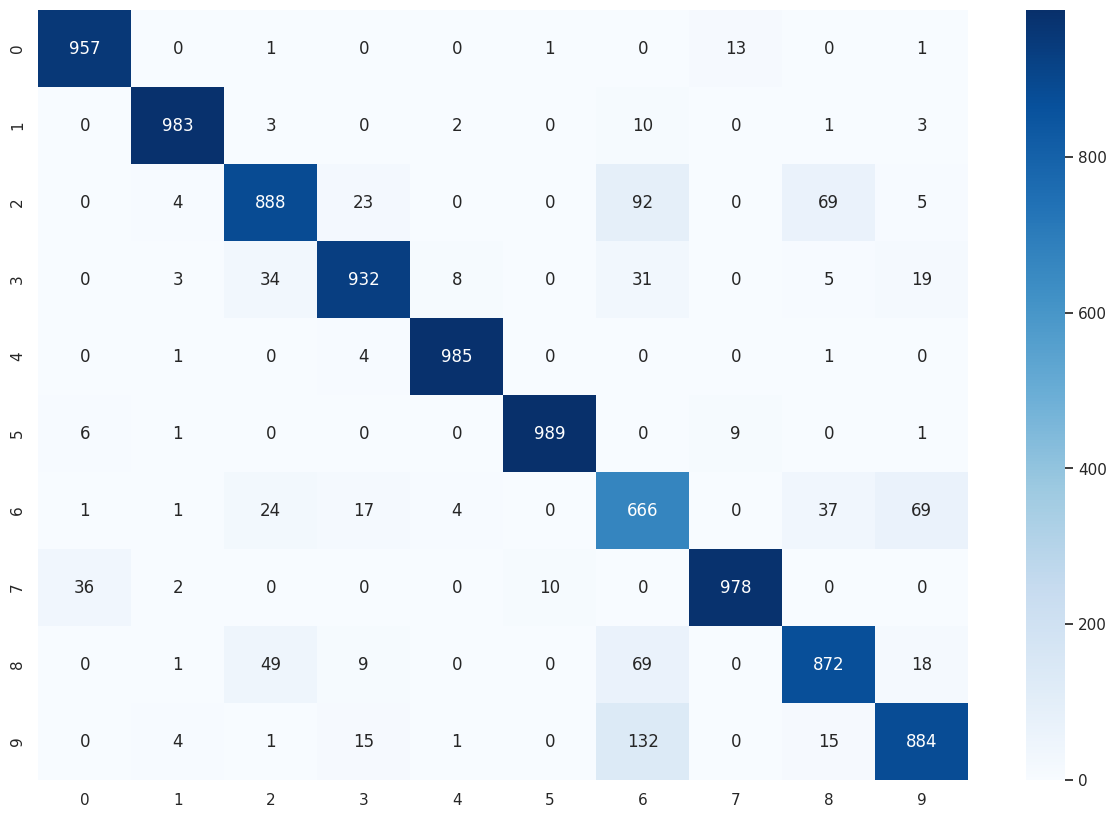

In [43]:
from pandas import DataFrame
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 10)})

df_confusion_matrix = DataFrame(confusion_matrix(model_prediction_result, model_prediction_answer))
sns.heatmap(df_confusion_matrix, cmap = "Blues",fmt = "d", annot = True)